책의 내용은 outdated. Zipline official tutorial을 따라하겠다. 

In [83]:
import pandas as pd

# from zipline.examples import buyapple # talib library가 없음. 
import pandas_datareader.data as web
from zipline.api import order, symbol, record
# from zipline.algorithm import TradingAlgorithm # deprecated. 

from zipline.data.bundles import register
from zipline.data.bundles.csvdir import csvdir_equities

import datetime
import matplotlib.pyplot as plt
import os, sys, platform

In [88]:
%load_ext zipline

In [21]:
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2020, 1, 10)

data = web.DataReader('AAPL', 'yahoo', start, end)
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,299.959991,292.750000,293.790009,299.799988,29596800.0,299.799988
2020-01-07,300.899994,297.480011,299.839996,298.390015,27218000.0,298.390015
2020-01-08,304.440002,297.160004,297.160004,303.190002,33019800.0,303.190002
2020-01-09,310.429993,306.200012,307.239990,309.630005,42527100.0,309.630005
2020-01-10,312.670013,308.250000,310.600006,310.329987,35161200.0,310.329987


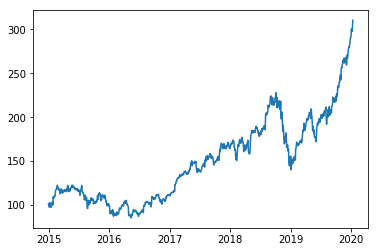

In [22]:
plt.plot(data.index, data['Adj Close'])
plt.show()

In [23]:
# %matplotlib # 별도의 창에 그래프 출력

Ingesting Data
If you haven’t ingested the data, you’ll need a Quandl API key to ingest the default bundle. Then run:

$ QUANDL_API_KEY=<yourkey> zipline ingest [-b <bundle>]
where <bundle> is the name of the bundle to ingest, defaulting to quandl.

you can check out the ingesting data section for more detail.

Default는 Quandl을 써야한다. 새로 자신만의 data bundle을 ingest 시킬 수도 있다. 

### Data Bundles
A data bundle is a collection of pricing data, adjustment data, and an asset database. Bundles allow us to preload all of the data we will need to run backtests and store the data for future runs.

### Discovering Available Bundles
Zipline comes with a few bundles by default as well as the ability to register new bundles. To see which bundles we have available, we may run the bundles command, for example:

### Ingesting Data from .csv Files

Zipline provides a bundle called csvdir, which allows users to ingest data from .csv files. The format of the files should be in OHLCV format, with dates, dividends, and splits. A sample is provided below. There are other samples for testing purposes in zipline/tests/resources/csvdir_samples.

In [24]:
data = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']] # To OHLCV format. 
data.tail()

,Open,High,Low,Adj Close,Volume
Date,,,,,
2020-01-06,293.790009,299.959991,292.750000,299.799988,29596800.0
2020-01-07,299.839996,300.899994,297.480011,298.390015,27218000.0
2020-01-08,297.160004,304.440002,297.160004,303.190002,33019800.0
2020-01-09,307.239990,310.429993,306.200012,309.630005,42527100.0
2020-01-10,310.600006,312.670013,308.250000,310.329987,35161200.0


In [75]:
data = data.rename(columns={'Open':'open', 'High':'high', 'Low':'low', 'Adj Close':'close', 'Volume':'volume'})
data.index.names = ['date']

data['dividend'] = 0
data['split'] = 1

data.tail()

,open,high,low,close,volume,dividend,split
date,,,,,,,
2020-01-06,293.790009,299.959991,292.750000,299.799988,29596800.0,0,1
2020-01-07,299.839996,300.899994,297.480011,298.390015,27218000.0,0,1
2020-01-08,297.160004,304.440002,297.160004,303.190002,33019800.0,0,1
2020-01-09,307.239990,310.429993,306.200012,309.630005,42527100.0,0,1
2020-01-10,310.600006,312.670013,308.250000,310.329987,35161200.0,0,1


In [76]:
data.head()

,open,high,low,close,volume,dividend,split
date,,,,,,,
2014-12-31,112.820000,113.129997,110.209999,101.419060,41403400.0,0,1
2015-01-02,111.389999,111.440002,107.349998,100.454300,53204600.0,0,1
2015-01-05,108.290001,108.650002,105.410004,97.624336,64285500.0,0,1
2015-01-06,106.540001,107.430000,104.629997,97.633545,65797100.0,0,1
2015-01-07,107.199997,108.199997,106.699997,99.002556,40105900.0,0,1


In [78]:
data.to_csv('AAPL.csv')

In [89]:
# We’ll then want to specify the start and end sessions of our bundle data:

start_session = pd.Timestamp('2014-12-31', tz='utc')
end_session = pd.Timestamp('2020-01-10', tz='utc')

In [90]:
AAPL_path = os.getcwd() + '\AAPL.csv'
# AAPL_path = "/Users/Jaepil/csvdir"
print(AAPL_path)

E:\VSCodeProjects\BOOK-python_algorithm_trading\64-bit-jupyter_notes\AAPL.csv


In [91]:
# And then we can register() our bundle, and pass the location of the directory in which our .csv files exist:
register(
    'custom-csvdir-bundle',
    csvdir_equities(
        ['daily'],
        AAPL_path,
    ),
    calendar_name='NYSE', # US equities
    start_session=start_session,
    end_session=end_session
)

! zipline ingest -b custom-csvdir-bundle

C:\Users\Jaepil\Anaconda3\envs\finance35\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Overwriting bundle with name 'custom-csvdir-bundle'
  # Remove the CWD from sys.path while we load stuff.
Error: No bundle registered with the name 'custom-csvdir-bundle'


In [92]:
! zipline bundles

csvdir <no ingestions>
quandl 2018-12-05 03:31:01.019935
quandl 2018-12-05 03:29:17.422113
quantopian-quandl 2018-12-05 06:50:49.551946
quantopian-quandl 2018-12-05 05:51:14.323103
quantopian-quandl 2018-12-05 05:50:43.861751
quantopian-quandl 2018-12-05 04:59:13.556148
quantopian-quandl 2018-12-05 03:56:31.595168


백테스팅에 사용할 데이터가 준비되면 알고리즘을 구현하면 됩니다. 앞서 설명한 것처럼 이번 절에서는 단순히 매일 정해진 수량의 주식을 매수하는 알고리즘을 구현해 보겠습니다.

Zipline을 이용해 알고리즘을 백테스팅하려면 먼저 initialize와 handle_data라는 함수를 구현해야 합니다. Zipline 백테스팅 시뮬레이터는 시뮬레이션을 수행하기 전에 항상 initialize 함수를 호출합니다. 따라서 여러분은 시뮬레이션에 사용할 초기 투자 금액이나 거래 수수료와 같은 값들을 initialize 함수에서 설정할 수 있습니다.

실제 거래 알고리즘은 handle_data라는 이름의 함수에서 구현하면 됩니다. Zipline 시뮬레이터는 시뮬레이션을 수행하는 동안 거래일마다 handle_data를 호출합니다. 그림 14.17은 Zipline 백테스팅의 주요 시뮬레이션 과정을 그림으로 나타낸 것입니다.


마치 아두이노같은 구조이다. initialize한 후 계속 loop를 돈다. 

In [5]:
def initialize(context):
    pass # 초기값 그대로 사용

handle_data 함수를 구현하기 전에 zipline.api 모듈로부터 사용할 함수를 임포트합니다. order는 Zipline 백테스팅 시뮬레이션에서 주문을 실행하는 함수이며, symbol은 참조할 데이터에 대한 심볼을 등록하는 함수입니다. order 함수를 사용해 심볼이 'AAPL'인 주식 한 주를 매수하도록 코드를 구현합니다.

In [6]:
def handle_data(context, data):
    order(symbol('AAPL'), 1) # symbol은 dataframe 객체에서 사용할 칼럼 인덱스이다. df의 칼럼을 AAPL로 맞춰줘야 한다. 
    record(AAPL=data.current(symbol('AAPL'), 'price')

SyntaxError: unexpected EOF while parsing (<ipython-input-6-9a1831a8ef9c>, line 3)

In [25]:
data = data[['Adj Close']]
data.columns = ['AAPL']
data = data.tz_localize('UTC') # 마지막으로 DataFrame 객체의 인덱스 값을 협정 세계시(UTC)로 변경합니다.
data.tail()

,AAPL
Date,
2020-01-06 00:00:00+00:00,299.799988
2020-01-07 00:00:00+00:00,298.390015
2020-01-08 00:00:00+00:00,303.190002
2020-01-09 00:00:00+00:00,309.630005
2020-01-10 00:00:00+00:00,310.329987


As you can see, we first have to import some functions we would like to use. All functions commonly used in your algorithm can be found in zipline.api. Here we are using order() which takes two arguments: a security object, and a number specifying how many stocks you would like to order (if negative, order() will sell/short stocks). In this case we want to order 10 shares of Apple at each iteration. For more documentation on order(), see the Quantopian docs.

Finally, the record() function allows you to save the value of a variable at each iteration. You provide it with a name for the variable together with the variable itself: varname=var. After the algorithm finished running you will have access to each variable value you tracked with record() under the name you provided (we will see this further below). You also see how we can access the current price data of the AAPL stock in the data event frame (for more information see here).

### Running in Jupyter

The IPython Notebook is a very powerful browser-based interface to a Python interpreter (this tutorial was written in it). As it is already the de-facto interface for most quantitative researchers zipline provides an easy way to run your algorithm inside the Notebook without requiring you to use the CLI.

To use it you have to write your algorithm in a cell and let zipline know that it is supposed to run this algorithm. This is done via the %%zipline IPython magic command that is available after you import zipline from within the IPython Notebook. This magic takes the same arguments as the command line interface described above. Thus to run the algorithm from above with the same parameters we just have to execute the following cell after importing zipline to register the magic.